In [21]:
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

data=pd.read_csv('data.csv')
gender={'male':0,'female':1}
race={'White':0, 'Black':1, 'Asian':2, 'Indian':3, 'Others':4 }

X=data['location']
y=data.drop('location',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [22]:
class image_data():
    
    def preprocessing(self,x,i):
        img=cv2.resize(cv2.imread(x.iloc[i]),(100,100))
        return img
            
    def create_dataframe(self,x):
        for i in range(len(x)):
            x.iloc[i]=self.preprocessing(x,i)
        
        return x
    
train=image_data().create_dataframe(X_train)
test=image_data().create_dataframe(X_test)

In [23]:
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,Dense,BatchNormalization,MaxPool2D,Dropout,Flatten
from tensorflow.keras import Input

class UTK_face_model():
    
    def common_model(self,inp_shape):
    
        x=Conv2D(64,(3,3),activation='relu')(inp_shape)
        x=MaxPool2D((2,2))(x)
        x=BatchNormalization()(x)

        x=Conv2D(64,(3,3),activation='relu')(x)
        x=MaxPool2D((2,2))(x)
        x=BatchNormalization()(x)

        x=Conv2D(64,(3,3),activation='relu')(x)
        x=MaxPool2D((2,2))(x)
        x=BatchNormalization()(x)

        x=Conv2D(64,(3,3),activation='relu')(x)
        x=MaxPool2D((2,2))(x)
        x=BatchNormalization()(x)

        return x

    def race_model(self,inp_shape,out):
        
        x=self.common_model(inp_shape)
        
        x=Flatten()(x)
        
        x=Dense(512,activation='relu')(x)
        x=Dropout(0.5)(x)
        
        x=Dense(256,activation='relu')(x)
        x=Dropout(0.5)(x)    
        
        x=Dense(out,activation='softmax')(x)
        
        return x
        
    def age_model(self,inp_shape):
        
        x=self.common_model(inp_shape)
        
        x=Dense(512,activation='relu')(x)
        x=Dropout(0.5)(x)
        
        x=Dense(256,activation='relu')(x)
        x=Dropout(0.5)(x)    
        
        x=Dense(1)(x)
        
        return x
        
    def gender_model(self,inp_shape,out):
        
        x=self.common_model(inp_shape)
        
        x=Flatten()(x)
        
        x=Dense(512,activation='relu')(x)
        x=Dropout(0.5)(x)
        
        x=Dense(256,activation='relu')(x)
        x=Dropout(0.5)(x)   
        
        x=Dense(out,activation='sigmoid')(x)
        
        return x

    def assemble_model(self,inp_shape,race,gender):
        
        inputs=Input(shape=inp_shape)
        
        race_out=self.race_model(inputs,race)
        age_out=self.age_model(inputs)
        gender_out=self.gender_model(inputs,gender)
        
        model=Model(inputs=inputs,outputs=[race_out,age_out,gender_out],name='UTK_face')
        
        return model

model=UTK_face_model().assemble_model((100,100,3),len(race),len(gender))    

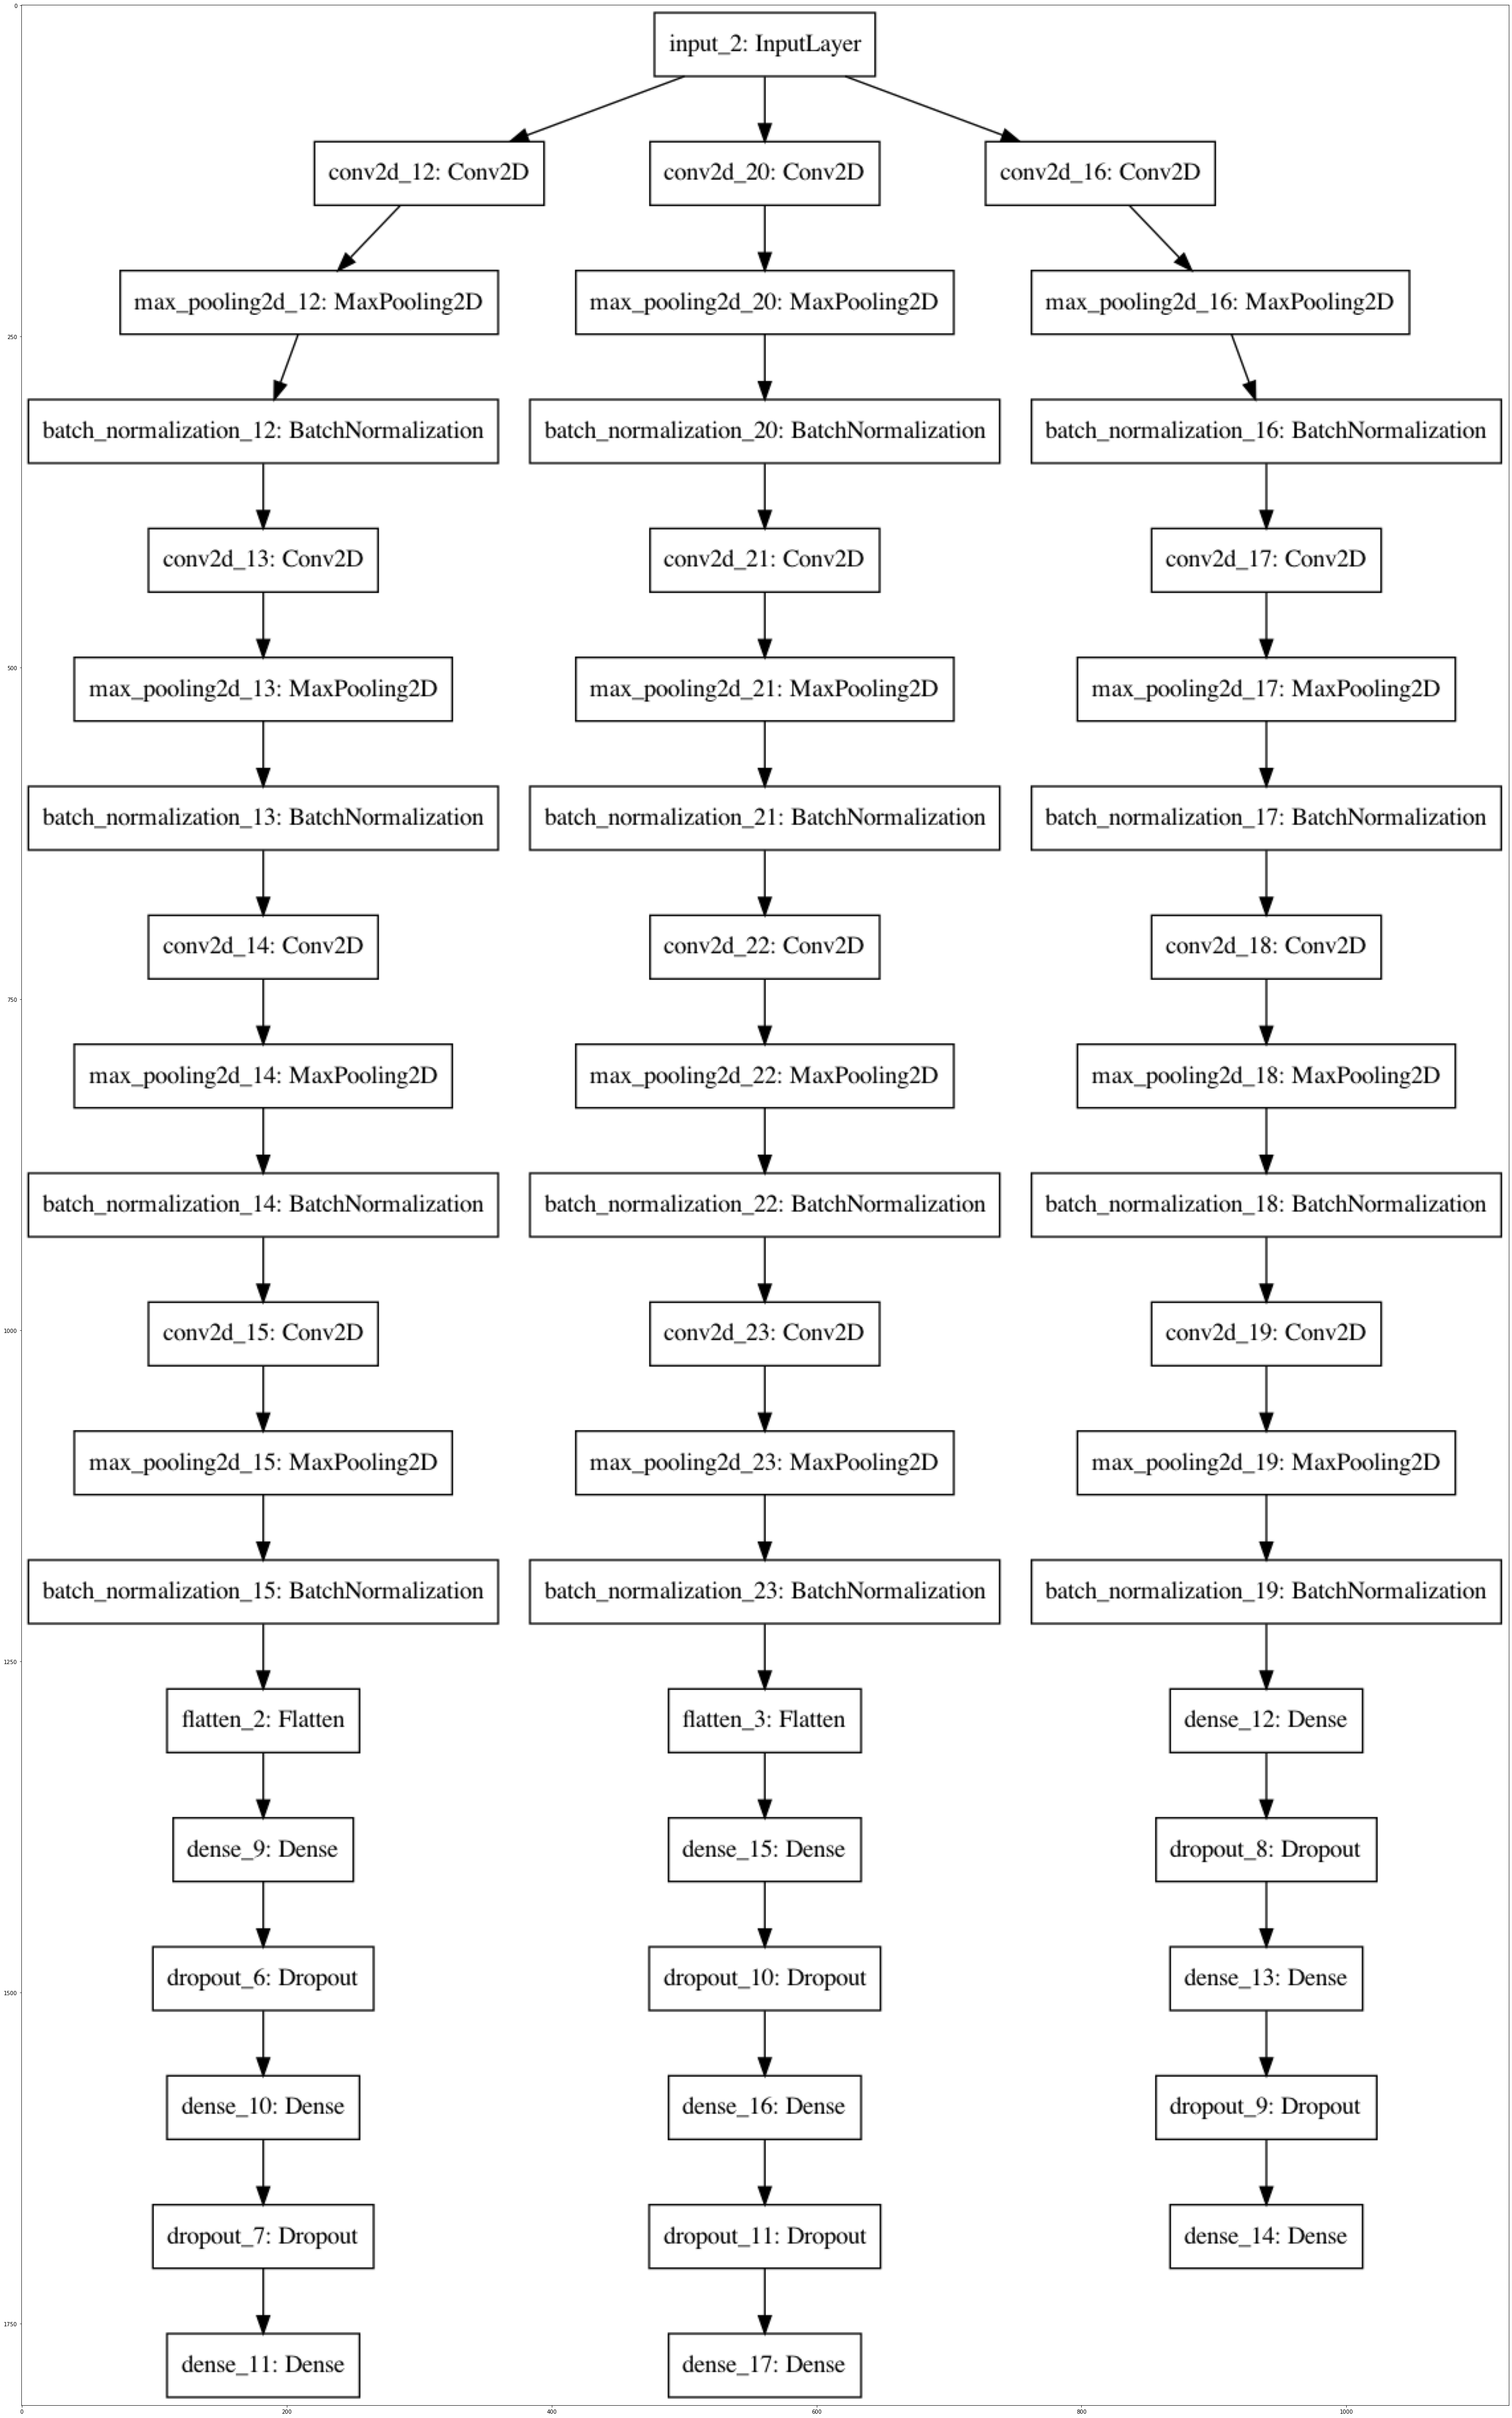

In [24]:
mplot=plot_model(model,to_file='model.png')
image=cv2.imread('model.png')
plt.figure(figsize=(50,100))
plt.imshow(image)

In [25]:
model.summary()

Model: "UTK_face"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 98, 98, 64)   1792        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 98, 98, 64)   1792        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D) (None, 49, 49, 64)   0           conv2d_12[0][0]                  
___________________________________________________________________________________________